First, Tensorflow must be installed:
- Open an Anaconda Prompt (Start Menu -> Anaconda3 -> Anaconda Prompt)
- pip install tensorflow

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def normalize(X):
    m = np.mean(X)
    standard_deviation = np.std(X)

    return (X - m) / standard_deviation

# Regression

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 5)                 10        
_________________________________________________________________
dense_55 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_56 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 6         
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


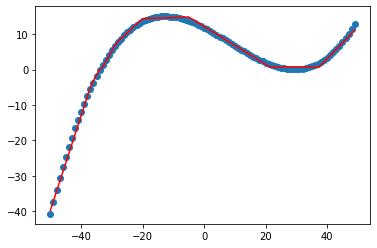

In [27]:
# linear, non-linear, very-wiggly
problem = "non-linear"

m_linear = 10
X_linear = np.arange(-m_linear / 2, m_linear / 2).reshape(1, m_linear)
Y_linear = 5 * (X_linear - 10) + 60# + 10 * (np.random.rand(1, m_linear) - 0.5)

m_non_linear = 100
X_non_linear = np.arange(-m_non_linear / 2, m_non_linear / 2).reshape(1, m_non_linear)
Y_non_linear = 0.0004 * (X_non_linear - 25) ** 3 + 0.02 * (X_non_linear - 30) ** 2# + 10 * (np.random.rand(1, m_non_linear) - 0.5)

m_very_wiggly = 1000
X_very_wiggly = np.arange(-m_very_wiggly / 2, m_very_wiggly / 2).reshape(1, m_very_wiggly)
Y_very_wiggly = 0.0002 * X_very_wiggly ** 2 + 10 * np.sin(X_very_wiggly / 25) + 10 * np.sin(X_very_wiggly / 50) + 10 * np.sin(X_very_wiggly / 100) + 10 * np.sin(X_very_wiggly / 200) + 10 * np.sin(X_very_wiggly / 400)# + 10 * (np.random.rand(1, m_very_wiggly) - 0.5)

if(problem == "linear"):
    m = m_linear
    X = X_linear
    Y = Y_linear
elif(problem == "non-linear"):
    m = m_non_linear
    X = X_non_linear
    Y = Y_non_linear
elif(problem == "very-wiggly"):
    m = m_very_wiggly
    X = X_very_wiggly
    Y = Y_very_wiggly

X_norm = normalize(X)
Y_norm = normalize(Y)

if(problem == "linear"):
    model = keras.Sequential([keras.layers.Dense(units = 2, activation = 'relu', input_shape = [1]),
                              keras.layers.Dense(units = 1)])
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.12), loss = 'mean_squared_error')
    model.fit(X_norm[0], Y_norm[0], epochs = 100, verbose = 0)
elif(problem == "non-linear"):
    model = keras.Sequential([keras.layers.Dense(units = 5, activation = 'relu', input_shape = [1]),
                              keras.layers.Dense(units = 5, activation = 'relu'),
                              keras.layers.Dense(units = 5, activation = 'relu'),
                              keras.layers.Dense(units = 1)])
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.025), loss = 'mean_squared_error')
    model.fit(X_norm[0], Y_norm[0], epochs = 3000, verbose = 0)
elif(problem == "very-wiggly"):
    model = keras.Sequential([keras.layers.Dense(units = 10, activation = 'relu', input_shape = [1]),
                              keras.layers.Dense(units = 10, activation = 'relu'),
                              keras.layers.Dense(units = 10, activation = 'relu'),
                              keras.layers.Dense(units = 10, activation = 'relu'),
                              keras.layers.Dense(units = 10, activation = 'relu'),
                              keras.layers.Dense(units = 1)])
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.01), loss = 'mean_squared_error')
    model.fit(X_norm[0], Y_norm[0], epochs = 30000, verbose = 0)

model.summary()
Y_hat_norm = model.predict(X_norm[0]).reshape(1, m)

mean_Y = np.mean(Y)
sd_Y = np.std(Y)
Y_hat = sd_Y * Y_hat_norm + mean_Y

plt.plot(X[0], Y[0], "o")
plt.plot(X[0], Y_hat[0], "r-")
plt.show()


# Classification

In [28]:
# simple
problem = "simple"

m_simple = 10
X_simple = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
Y_simple = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0])

if(problem == "simple"):
    m = m_simple
    X = X_simple
    Y = Y_simple
    
X_norm = normalize(X)

model = tf.keras.models.Sequential([keras.layers.Dense(units = 2, activation = 'relu', input_shape = [1]),
                                    tf.keras.layers.Dense(2, activation = 'softmax')])
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.12),
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_norm, Y, epochs = 100, verbose = 0)

model.summary()
Y_hat_norm = model.predict(X_norm)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_59 (Dense)             (None, 2)                 6         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
